# preprocessing data

In [470]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [471]:
import warnings
warnings.filterwarnings('ignore')

In [472]:
data = 'grades.csv'
df = pd.read_csv(data, header=None)

In [473]:
df.shape

(73, 9)

In [474]:
df.head()

,0,1,2,3,4,5,6,7,8
0,PUPIL_SEX,PUPIL_CLASS,TEACHER_RIGHT,TEACHER_CHK,TEACHER_QUEST,TEACHER_CORR,PUPIL_CORR,PUPIL_STRIP,GRADE
1,F,8A,65,0,4,2,1,6,4-
2,F,8A,70,4,0,4,0,4,3
3,F,8A,85,0,0,4,3,5,4
4,M,8A,55,0,0,1,8,3,3


In [475]:
col_names = [df[i][0] for i in range(df.shape[1])]
col_names

['PUPIL_SEX',
 'PUPIL_CLASS',
 'TEACHER_RIGHT',
 'TEACHER_CHK',
 'TEACHER_QUEST',
 'TEACHER_CORR',
 'PUPIL_CORR',
 'PUPIL_STRIP',
 'GRADE']

In [487]:
df = df[1:]
df.columns = col_names
df

,PUPIL_SEX,PUPIL_CLASS,TEACHER_RIGHT,TEACHER_CHK,TEACHER_QUEST,TEACHER_CORR,PUPIL_CORR,PUPIL_STRIP,GRADE
2,F,8A,70,4,0,4,0,4,3
3,F,8A,85,0,0,4,3,5,4
4,M,8A,55,0,0,1,8,3,3
5,M,8A,40,1,2,0,3,4,2
6,M,8A,65,0,3,4,4,8,4-
...,...,...,...,...,...,...,...,...,...
68,F,8A,80,1,0,2,1,7,4-
69,F,8A,85,0,0,1,2,2,4
70,F,8A,90,0,0,0,1,1,4
71,F,8A,95,0,0,3,1,2,5-


#data analysis

In [477]:
for col in col_names:
    print(df[col].value_counts())

F    58
M    14
Name: PUPIL_SEX, dtype: int64
8A    54
8B    18
Name: PUPIL_CLASS, dtype: int64
100    17
60      7
80      6
40      6
0       5
50      4
30      4
90      4
85      3
70      3
20      2
65      2
55      2
95      2
87      1
75      1
86      1
67      1
15      1
Name: TEACHER_RIGHT, dtype: int64
0    56
1    13
4     1
3     1
2     1
Name: TEACHER_CHK, dtype: int64
0    51
1    11
2     6
3     3
4     1
Name: TEACHER_QUEST, dtype: int64
0    23
1    18
2    16
4     7
3     4
6     2
5     2
Name: TEACHER_CORR, dtype: int64
0     30
1     18
3      7
2      7
4      3
5      3
8      2
10     1
9      1
Name: PUPIL_CORR, dtype: int64
0     18
1     14
2     10
4      8
5      8
3      4
6      2
12     2
7      2
8      1
9      1
10     1
11     1
Name: PUPIL_STRIP, dtype: int64
4     20
3     13
2     11
5     11
4-     8
5-     7
3-     2
Name: GRADE, dtype: int64


In [478]:
df.isnull().sum()

PUPIL_SEX        0
PUPIL_CLASS      0
TEACHER_RIGHT    0
TEACHER_CHK      0
TEACHER_QUEST    0
TEACHER_CORR     0
PUPIL_CORR       0
PUPIL_STRIP      0
GRADE            0
dtype: int64

In [479]:
!pip install category_encoders

In [480]:
from sklearn.model_selection import train_test_split
import category_encoders as ce

# splitting the dataset function
def make_data(df, test_size_param):
  X = df.drop(['GRADE'], axis=1)
  y = df['GRADE']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_param, random_state = 42)
  encoder = ce.OrdinalEncoder(cols=['PUPIL_SEX','PUPIL_CLASS','TEACHER_RIGHT','TEACHER_CHK','TEACHER_QUEST',
                                  'TEACHER_CORR','PUPIL_CORR','PUPIL_STRIP'])
  X_train = encoder.fit_transform(X_train)
  X_test = encoder.transform(X_test)

  return X_train, X_test, y_train, y_test

In [481]:
X_train, X_test, y_train, y_test = make_data(df, test_size_param=0.15)
X_train

,PUPIL_SEX,PUPIL_CLASS,TEACHER_RIGHT,TEACHER_CHK,TEACHER_QUEST,TEACHER_CORR,PUPIL_CORR,PUPIL_STRIP
32,1,1,1,1,1,1,1,1
10,1,1,1,2,1,2,2,2
46,2,2,2,1,2,1,1,1
6,2,1,3,1,3,3,3,3
23,1,1,1,1,1,4,1,2
...,...,...,...,...,...,...,...,...
24,1,1,6,1,1,1,5,5
21,1,1,13,1,3,1,1,2
61,1,1,1,1,1,4,4,4
15,1,1,19,2,1,2,4,1


#modeling tree

In [482]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn import tree

# creating decistion tree and report
def make_tree(df, criterion_param="entropy", test_size_param=0.15):
  X_train, X_test, y_train, y_test = make_data(df, test_size_param)
  clf_en = DecisionTreeClassifier(criterion=criterion_param, random_state=0)  # Create Decision Tree classifer object
  clf_en.fit(X_train, y_train)                                                # Train Decision Tree Classifer
  y_pred_en = clf_en.predict(X_test)                                          # Predict the response for test dataset

  print(classification_report(y_test, clf_en.predict(X_test)))

  fn=['PUPIL_SEX','PUPIL_CLASS','TEACHER_RIGHT','TEACHER_CHK','TEACHER_QUEST',
                                  'TEACHER_CORR','PUPIL_CORR','PUPIL_STRIP']
  cn = ['2','3','3-','4','4-','5','5-']
  plt.figure(figsize=(40,20))
  tree.plot_tree(clf_en.fit(X_train, y_train), fontsize=10, feature_names = fn, 
               class_names = cn, filled = True)

  return clf_en

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.38      0.60      0.46         5
          3-       0.00      0.00      0.00         1
           4       1.00      0.17      0.29         6
          4-       0.00      0.00      0.00         3
           5       0.57      0.67      0.62         6
          5-       0.11      1.00      0.20         1

    accuracy                           0.31        29
   macro avg       0.29      0.35      0.22        29
weighted avg       0.39      0.31      0.27        29



DecisionTreeClassifier(criterion='entropy', random_state=0)

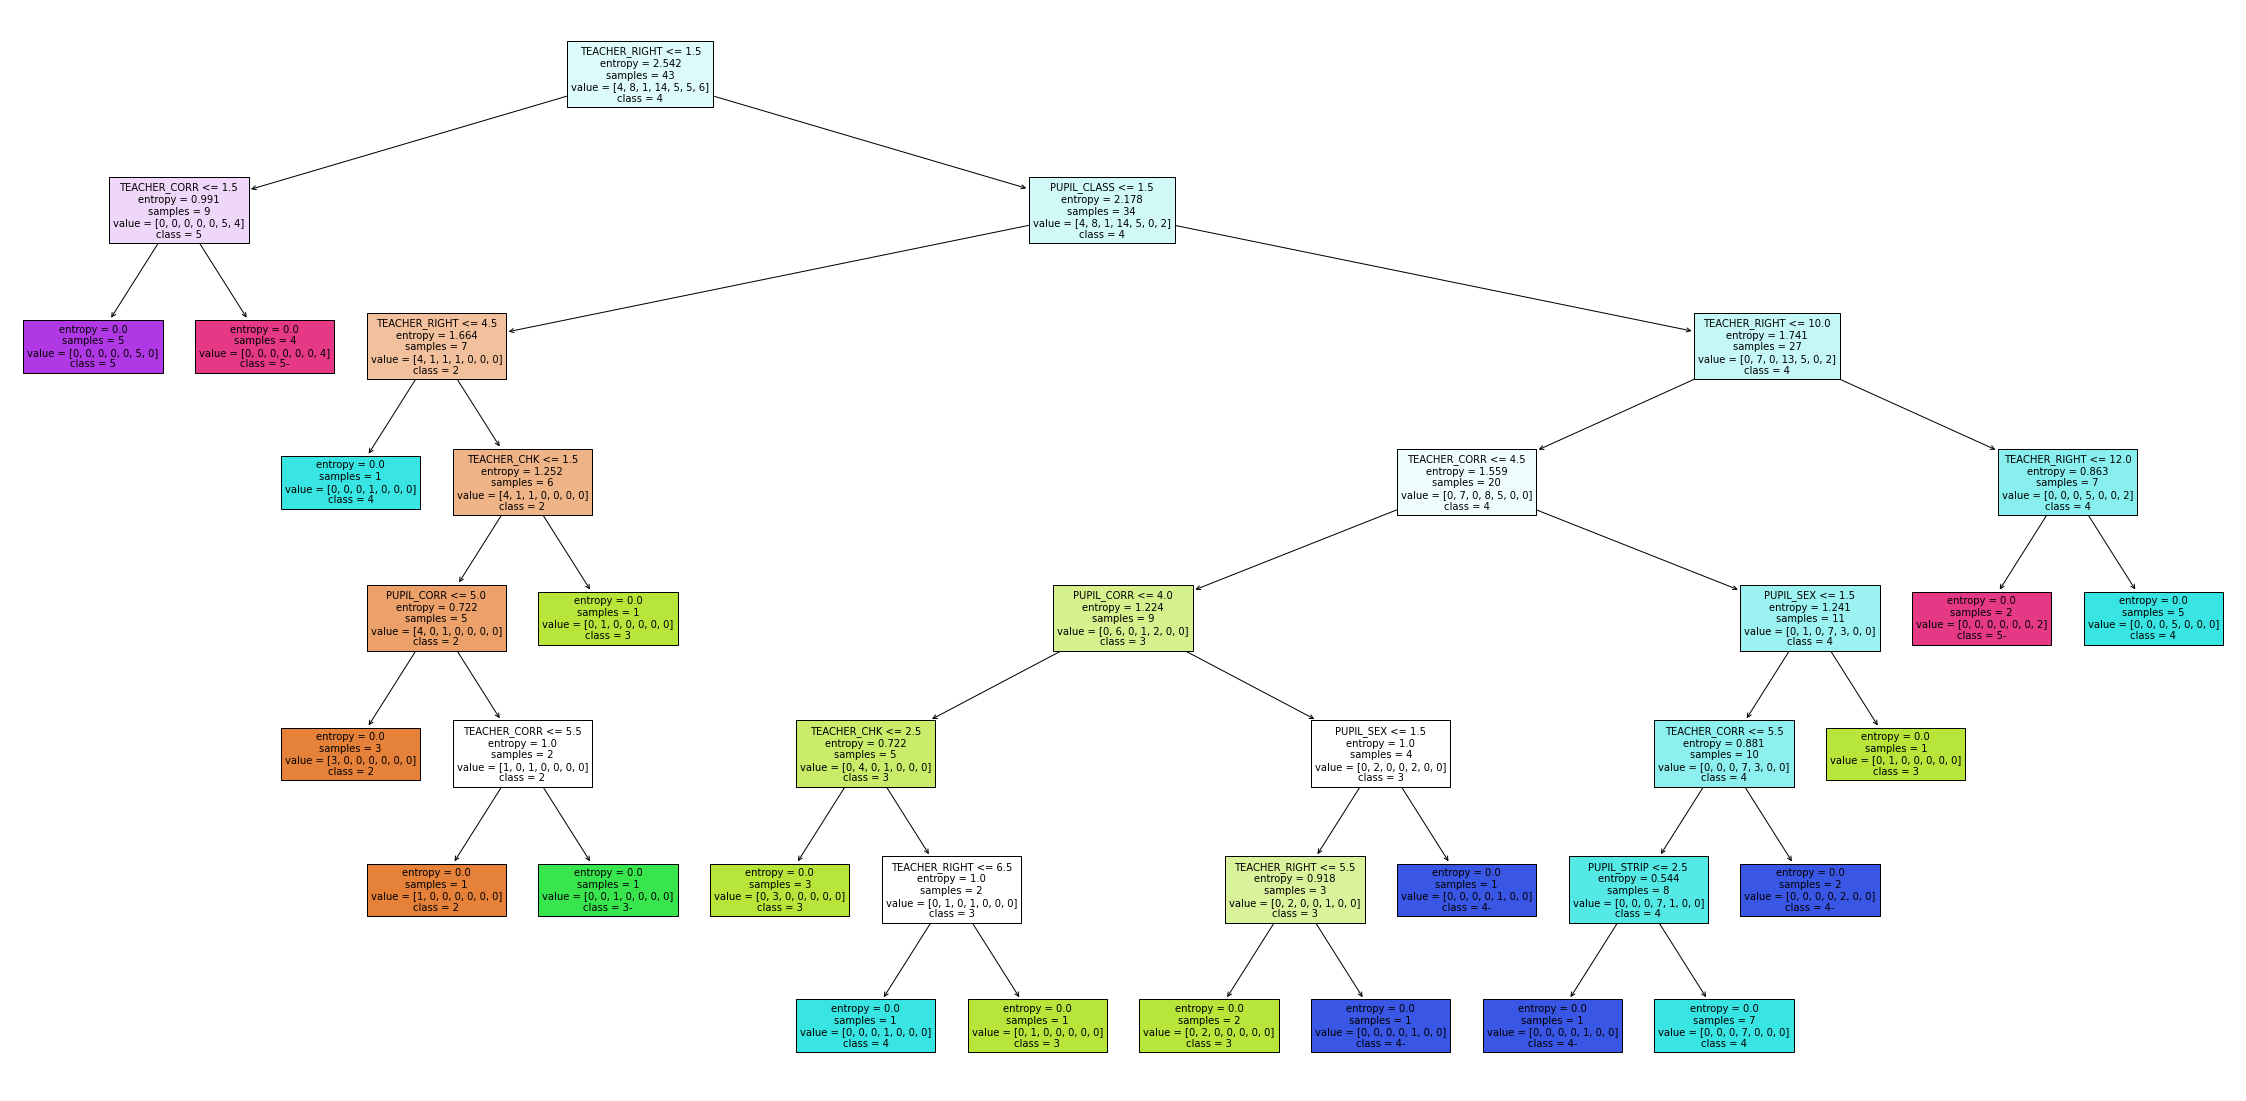

In [483]:
make_tree(df, criterion_param="entropy", test_size_param=0.4)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.67      0.40      0.50         5
          4-       0.00      0.00      0.00         3
           5       0.40      0.50      0.44         4
          5-       0.11      1.00      0.20         1

    accuracy                           0.23        22
   macro avg       0.20      0.32      0.19        22
weighted avg       0.23      0.23      0.20        22



DecisionTreeClassifier(criterion='entropy', random_state=0)

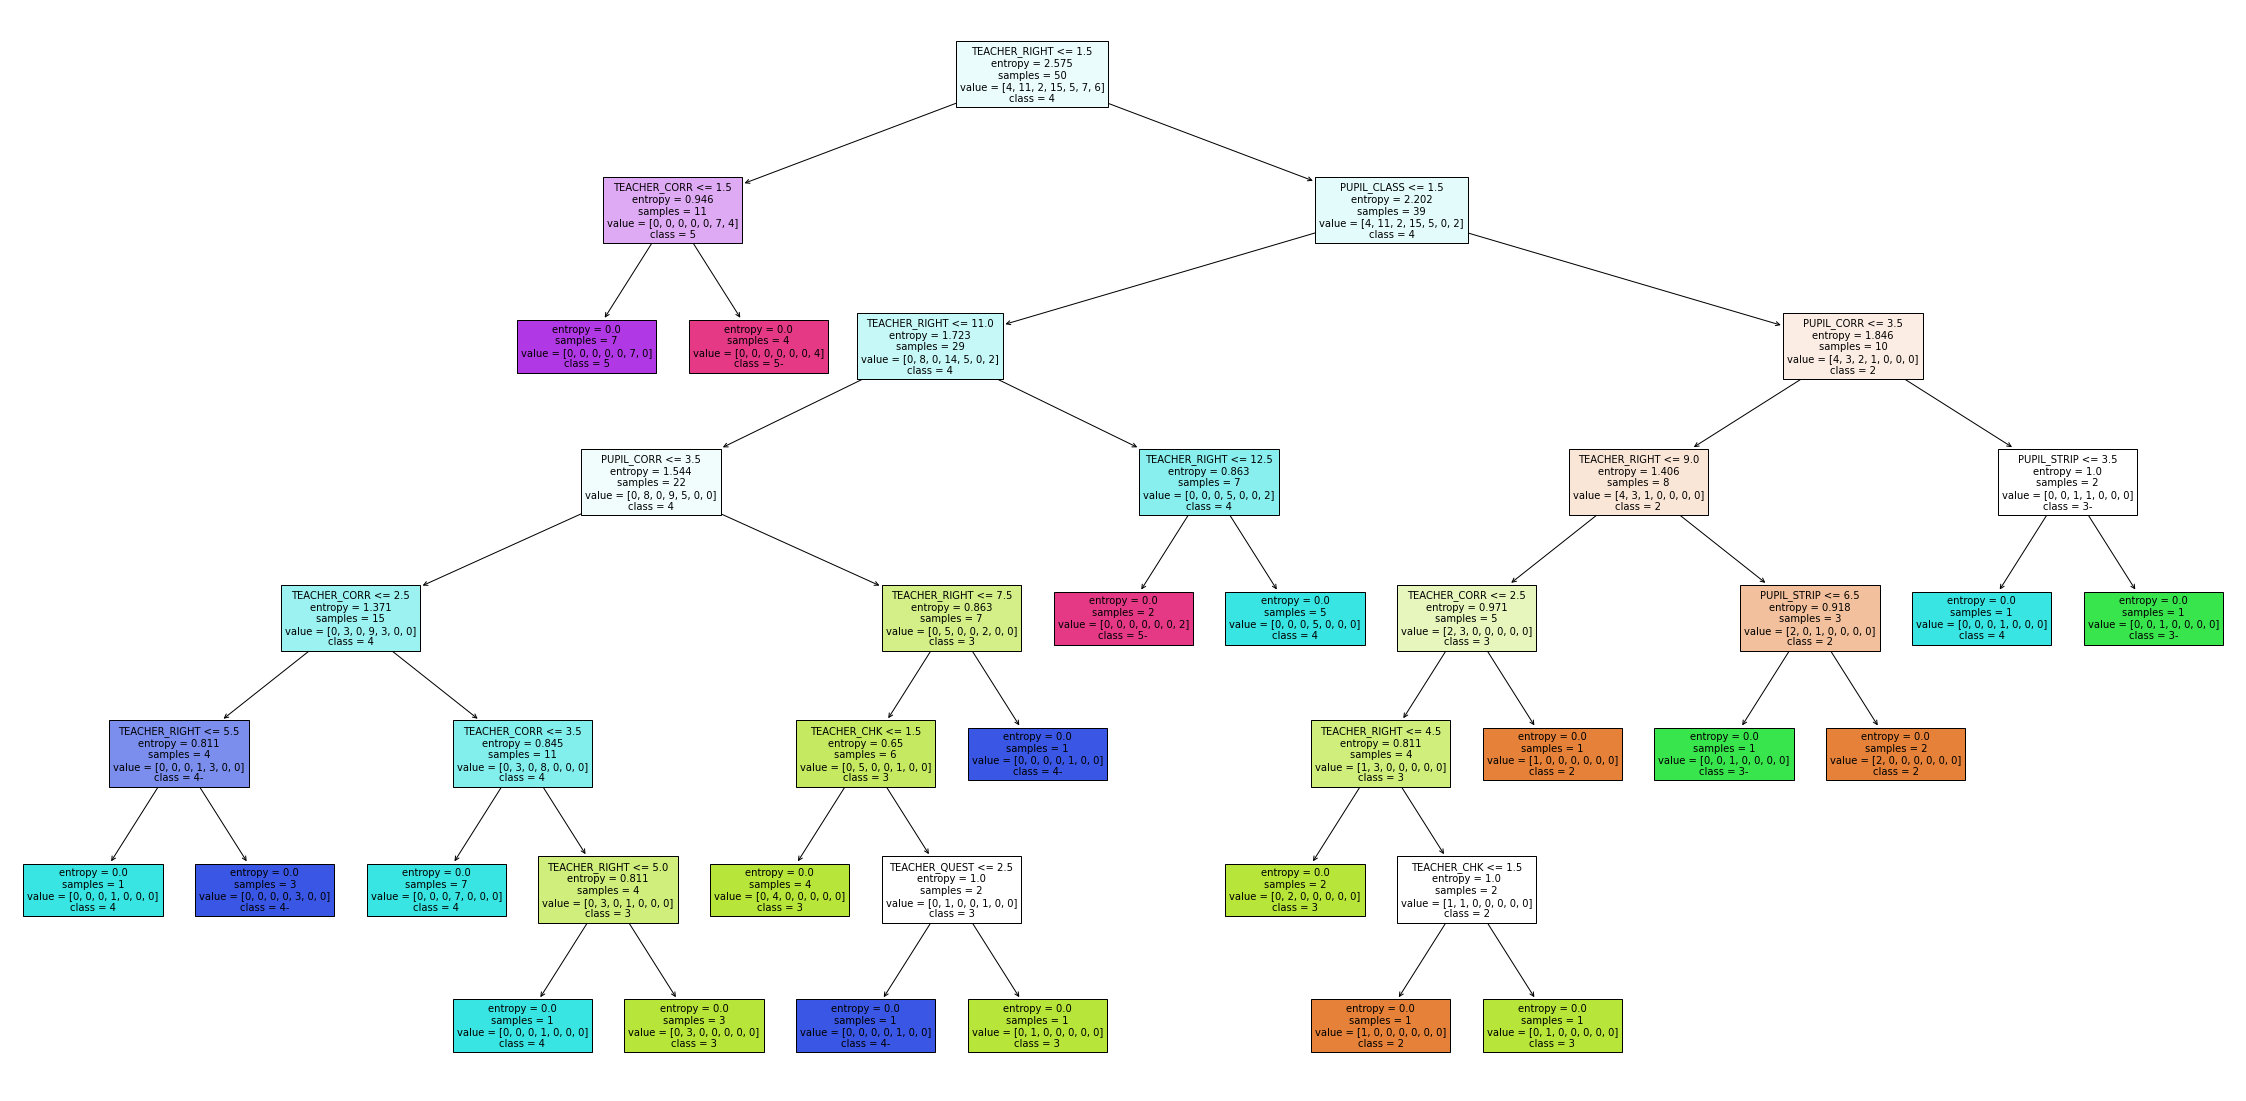

In [484]:
make_tree(df, criterion_param="entropy", test_size_param=0.3)

              precision    recall  f1-score   support

           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         2
           4       0.20      0.33      0.25         3
          4-       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
          5-       0.17      1.00      0.29         1

    accuracy                           0.27        15
   macro avg       0.31      0.33      0.24        15
weighted avg       0.35      0.27      0.25        15



DecisionTreeClassifier(criterion='entropy', random_state=0)

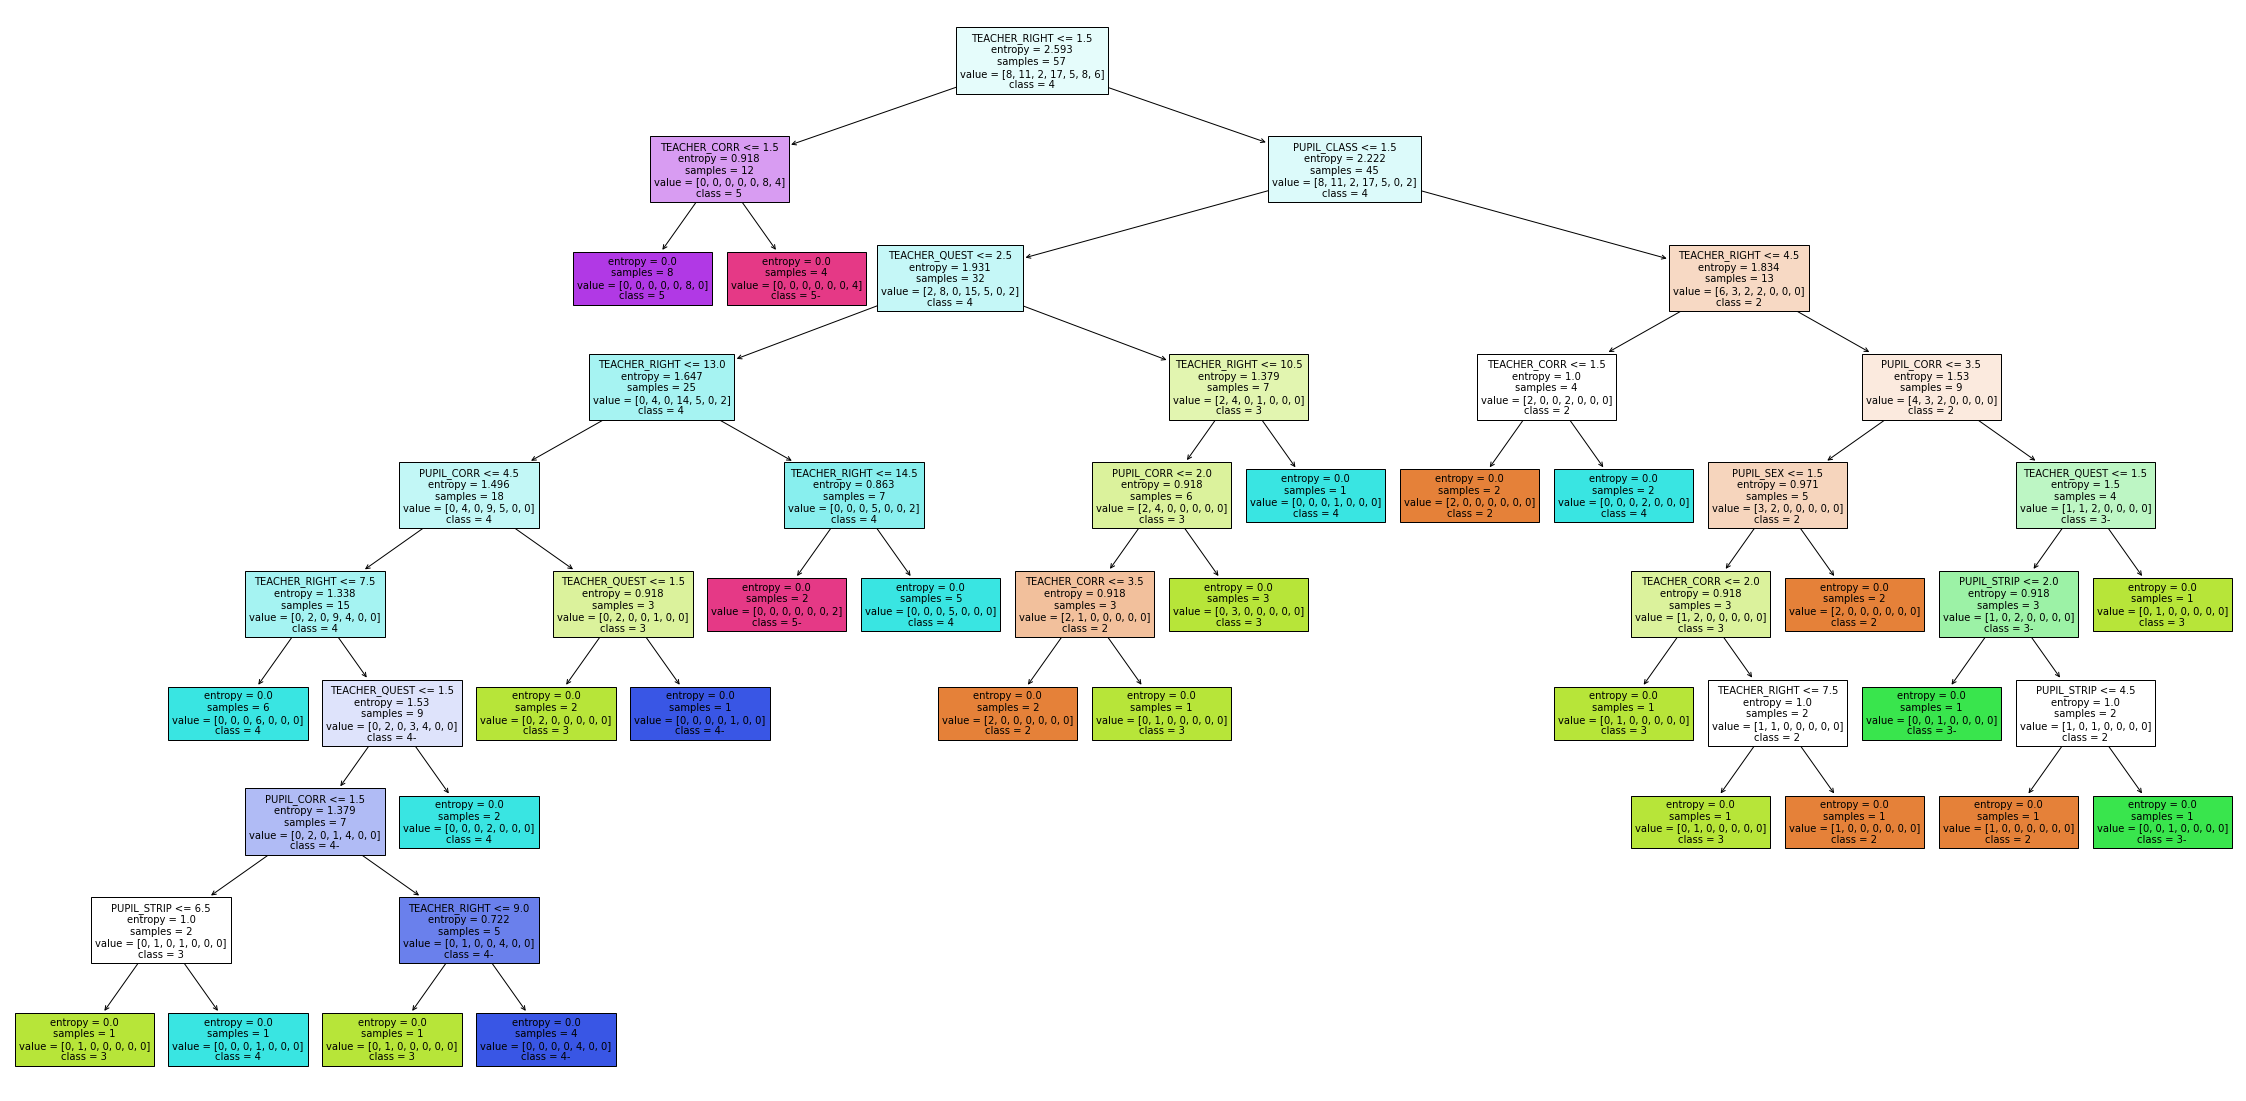

In [485]:
make_tree(df, criterion_param="entropy", test_size_param=0.2)

              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         2
           4       0.50      1.00      0.67         1
          4-       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
          5-       0.50      1.00      0.67         1

    accuracy                           0.62         8
   macro avg       0.58      0.67      0.56         8
weighted avg       0.69      0.62      0.58         8



DecisionTreeClassifier(criterion='entropy', random_state=0)

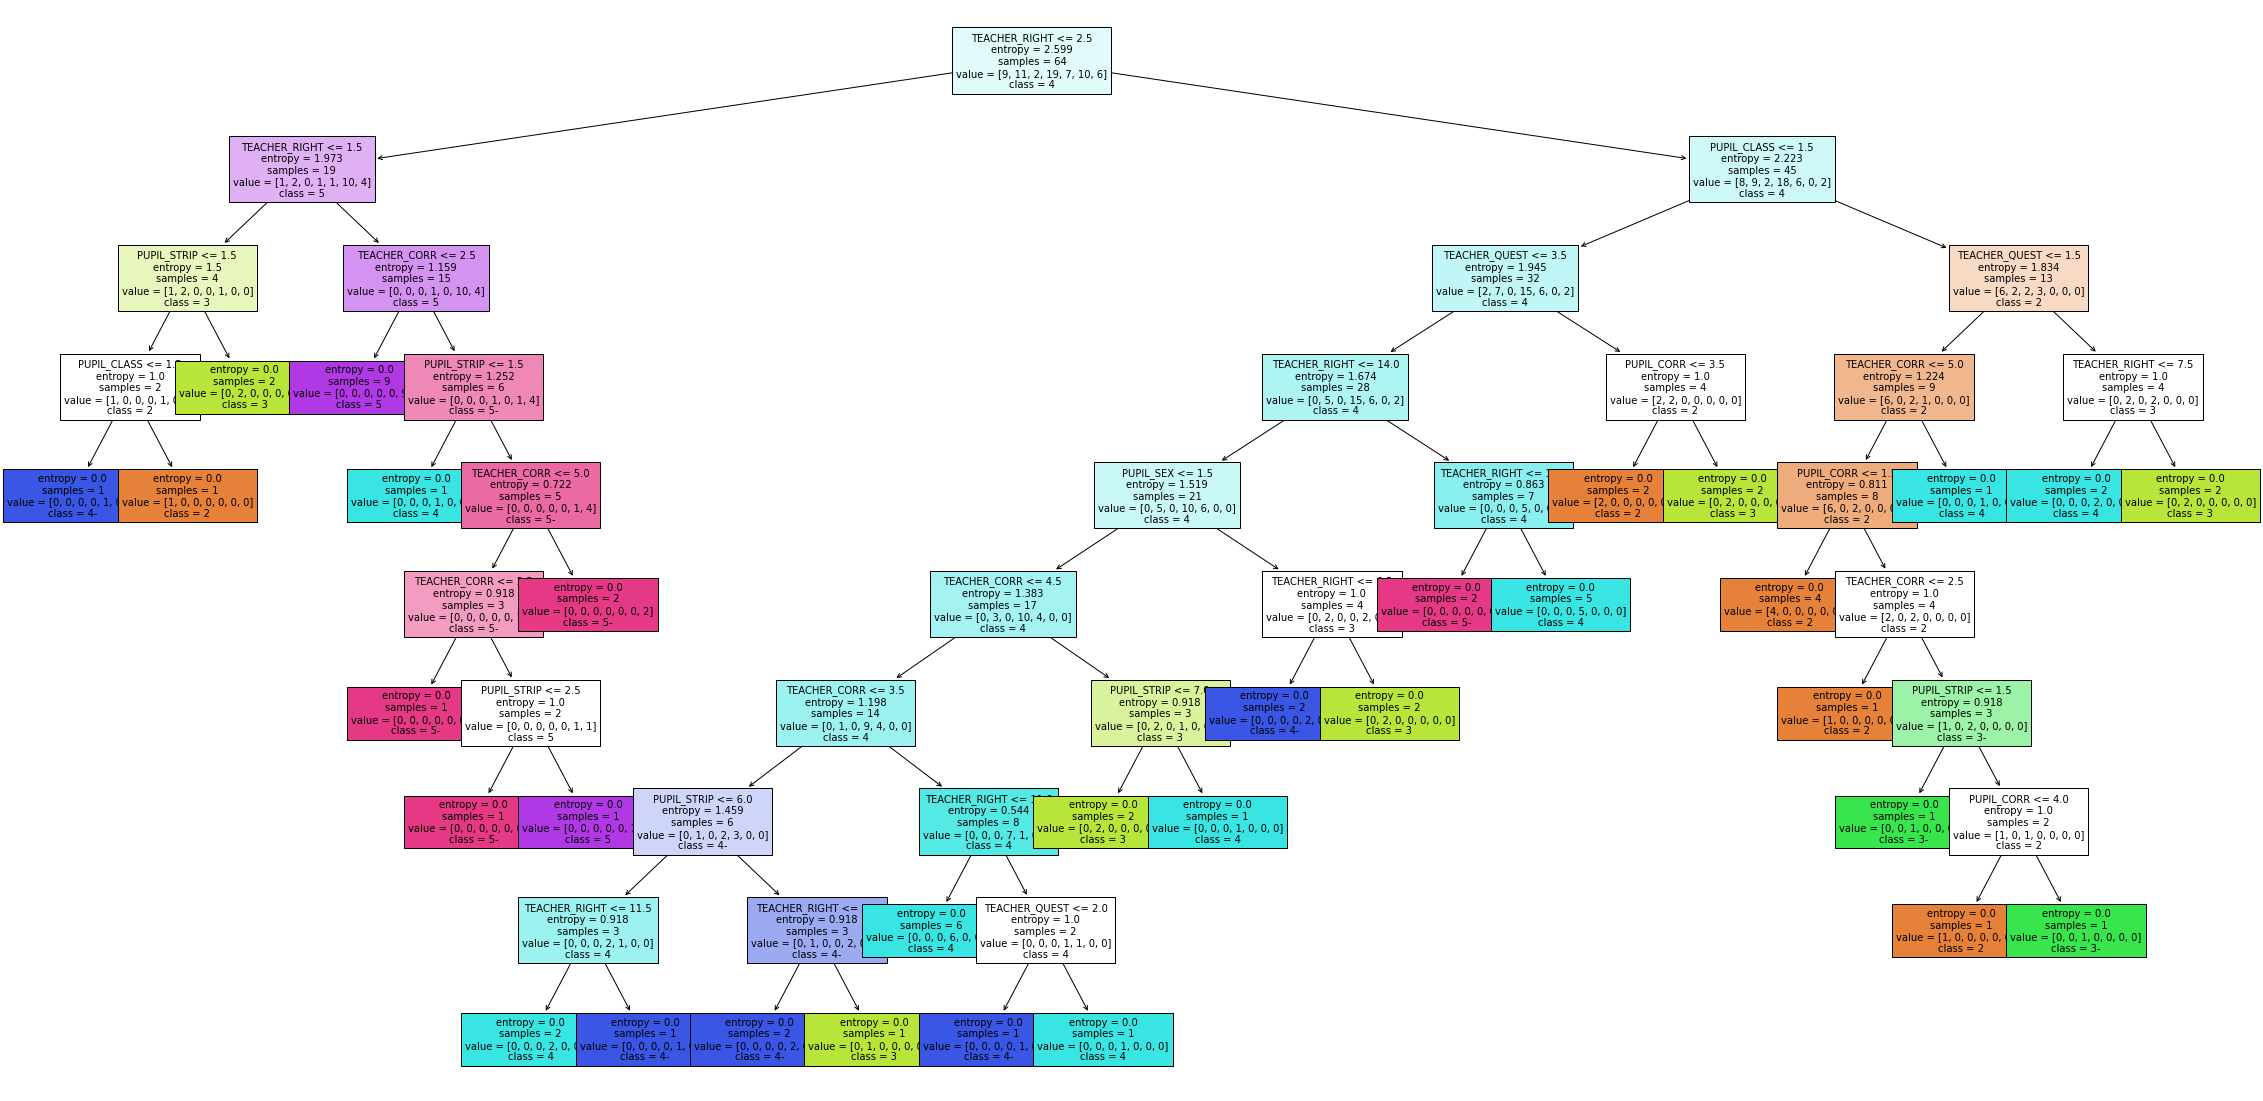

In [486]:
make_tree(df, criterion_param="entropy", test_size_param=0.1)